# **Problem Statment**

Perform Principal component analysis and perform clustering using first 

3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 

optimum number of clusters and check whether we have obtained same number of clusters with the original data 

(class column we have ignored at the begining who shows it has 3 clusters)df


# **Importing Libraries**

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Importing dataset**

In [3]:
df=pd.read_csv('wine.csv')

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df1 = df.iloc[:,1:]

In [6]:
df1.head(5)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **Performing EDA**

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df1.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

**As we can see above there are no null values in the dataset.**

In [9]:
df1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

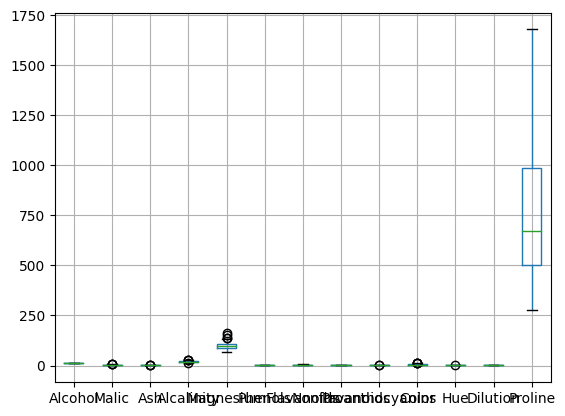

In [10]:
df1.boxplot()

**As we can see above there are not having outliers in our data.**

In [11]:
#Finding correlation between the variables in the data
df1.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


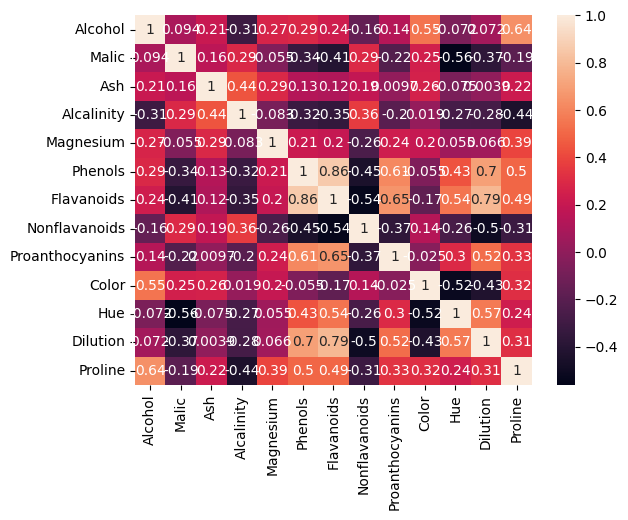

In [12]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

**There are some quite correlation between variables. For example the correlation between flavanoids and dilution is pretty high (78%). Thus we can remove that variable from our dataset. However this method is long and tedious. Hence we PCA method for Dimensionality Reduction.**

# **Normalize the data**

In [13]:
df_norm = StandardScaler().fit_transform(df1) # normalizing the data 

In [14]:
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# **Dimensionality Reduction Using PCA**

In [15]:
pca = PCA(n_components=13)

In [16]:
principalComponents = pca.fit_transform(df_norm)

In [17]:
principalComponents

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [18]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

([<matplotlib.axis.XTick at 0x7fe34694fc70>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

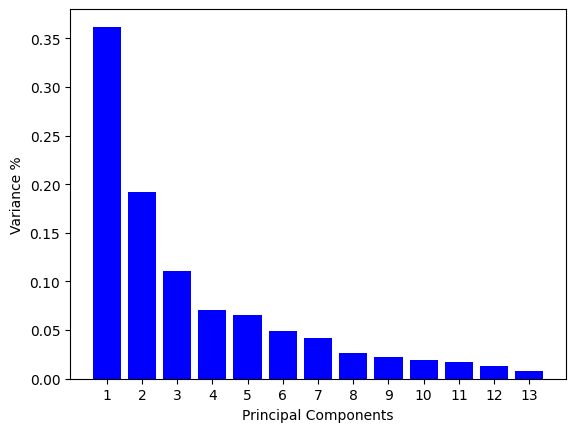

In [20]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

**As we can see above the maximum varaiance of the data is covered in the 3 princial components so we can use 3 principle components for the model instead of 13 features.**

# **Kmeans clustering**

To find optimum nuber of clusters

# Elbow method

In [24]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_components.iloc[:,:3])
    wcss.append(kmeans.inertia_)

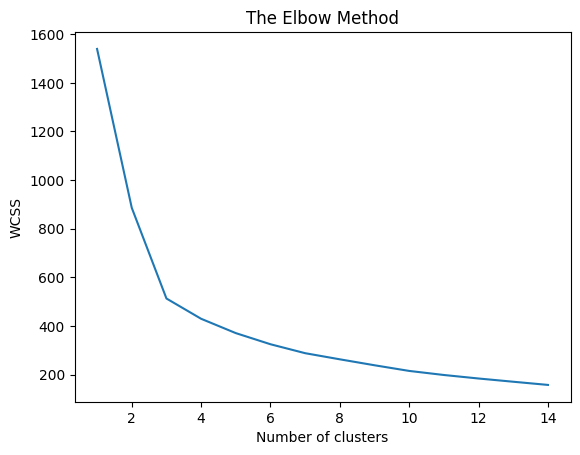

In [25]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**As we can see above the optimum number of clusters are 3 by using elbow method.Let's conform it with the silhoutte score.**

# Silhouette score

In [30]:
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(PCA_components.iloc[:,:3]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(PCA_components.iloc[:,:3],labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3893881308900331
Silhouette score for k(clusters) = 3 is 0.45323512156839507
Silhouette score for k(clusters) = 4 is 0.4111755985888774
Silhouette score for k(clusters) = 5 is 0.38357503215889105
Silhouette score for k(clusters) = 6 is 0.354742556490522
Silhouette score for k(clusters) = 7 is 0.31121013061028346
Silhouette score for k(clusters) = 8 is 0.29726698631636633
Silhouette score for k(clusters) = 9 is 0.28063134423744013
Silhouette score for k(clusters) = 10 is 0.3094449767523678
Silhouette score for k(clusters) = 11 is 0.3007478780113312


**So by using the silhouette score also we can see the optimum number of clusters are 3.**

In [31]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:3])

KMeans(n_clusters=3)

In [33]:
labels = model.predict(PCA_components.iloc[:,:3])

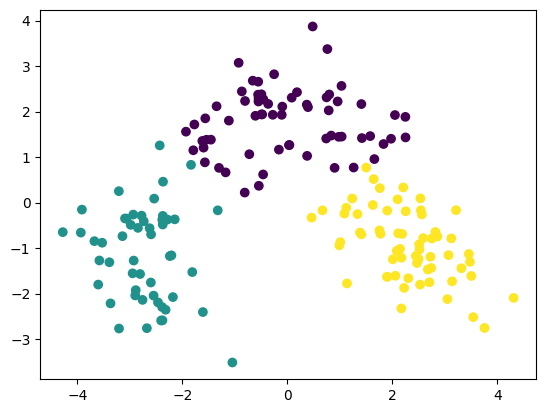

In [37]:
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [39]:
k_new_df=pd.DataFrame(principalComponents[:,0:3])

In [40]:
model_k = KMeans(n_clusters=3)
model_k.fit(k_new_df)

KMeans(n_clusters=3)

In [41]:
model_k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [42]:
md=pd.Series(model_k.labels_)

In [43]:
df1['clust']=md

In [44]:
k_new_df.head()

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [45]:
df1.groupby(df1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095
2,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125


# **Hierarchial Clustering**

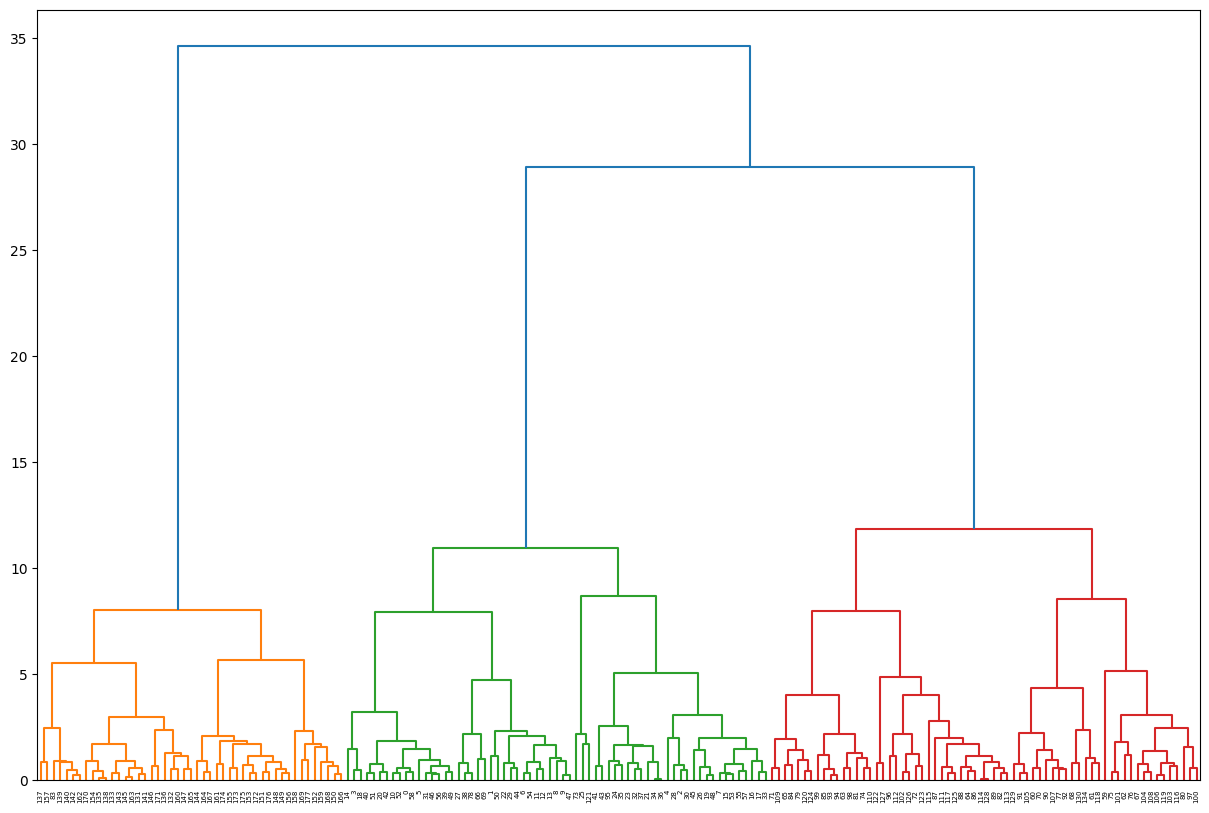

In [46]:
# create dendrogram
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(PCA_components.iloc[:,:3], method='ward'))

**The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 15 and cut the dendrogram:**

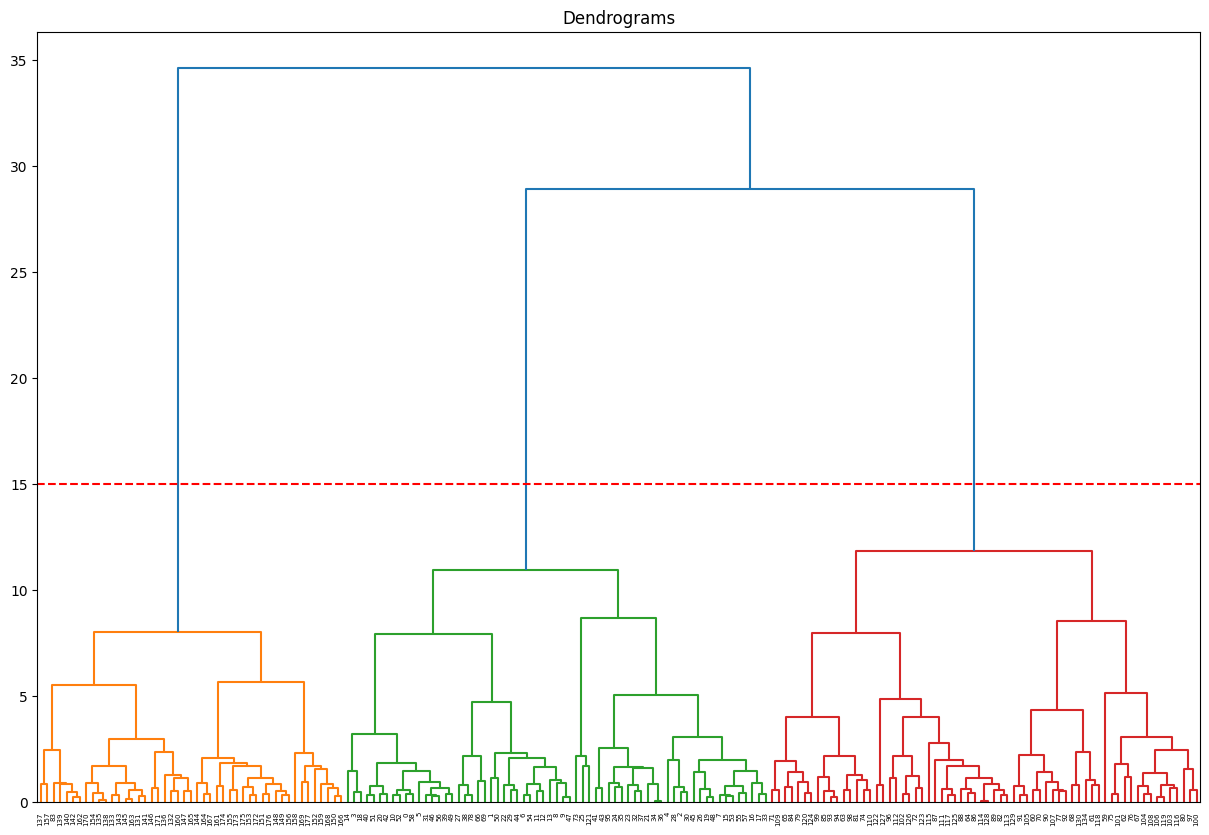

In [47]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(PCA_components.iloc[:,:3], method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

**so as we can see above the optimum number of clusters are 3.**

In [48]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [49]:
h_cluster = model2.fit(PCA_components.iloc[:,:3])

In [50]:
labels2 = model2.labels_

In [51]:
X = PCA_components.iloc[:,:1]
Y = PCA_components.iloc[:,1:2]

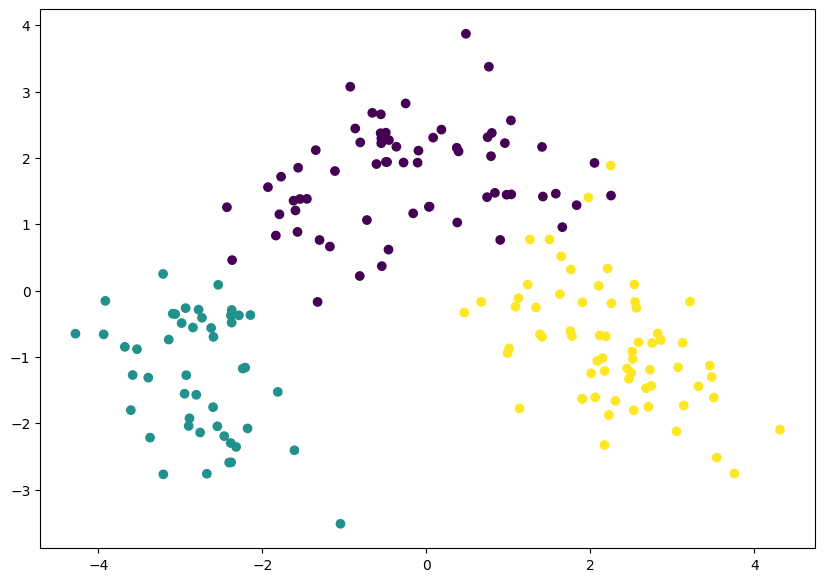

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(X, Y, c=labels2) 

In [56]:
h_new_df=pd.DataFrame(principalComponents[:,0:3])

In [57]:
h_new_df.head()

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [58]:
h_complete = AgglomerativeClustering(n_clusters=5,linkage='complete',affinity = "euclidean").fit(h_new_df) 

In [59]:
h_complete.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 1,
       1, 2, 2, 1, 2, 1, 3, 4, 1, 2, 2, 3, 1, 1, 2, 1, 3, 0, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 1,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 4, 0, 3, 1, 3, 3, 0, 3, 3, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [60]:
cluster_labels=pd.Series(h_complete.labels_)

In [61]:
df1['clust']=cluster_labels

In [62]:
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [63]:
df1.groupby(df1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
1,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436
2,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,12.153200,2.035600,2.381200,21.808000,90.360000,2.020800,1.888800,0.427600,1.455200,2.769600,1.041200,2.736800,472.800000
4,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000


# **Conclusion:**

# Using PCA we reduced the variables to only 3 from 13 and use clustering classification, we can safely assume that there exists 3 cluster in the wine data sets